# Analisis Data Hotel Booking Demand

- Nama Lengkap: Vito Ghifari
- NIM: 16520255
- Universitas: Institut Teknologi Bandung

Tanggal mulai pengerjaan tugas: 7 November 2020

Sumber dataset: [Kaggle Hotel booking demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand) dengan lisensi Attribution 4.0 International (CC BY 4.0)

Informasi dataset: [Science Direct](https://www.sciencedirect.com/science/article/pii/S2352340918315191)

### Import Library yang Dibutuhkan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

### Load DataFrame

In [2]:
df = pd.read_csv("hotel_bookings.csv")

print(f'Ukuran Dataframe: {df.shape[0]} baris dan {df.shape[1]} kolom')
df.head()

Ukuran Dataframe: 119390 baris dan 32 kolom


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data Cleaning

Pertama, cari missing value pada dataframe.

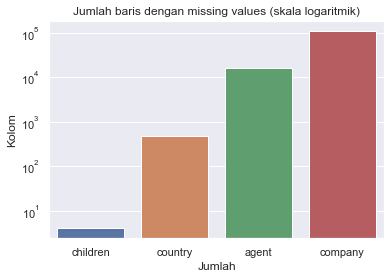

In [3]:
# List kolom-kolom dengan missing values
null_columns = df.columns[df.isna().any()]
y = df[null_columns].isna().sum()

sns.barplot(x=null_columns, y=y, ci=None,) 
plt.title('Jumlah baris dengan missing values (skala logaritmik)')
plt.xlabel('Jumlah')
plt.ylabel('Kolom')
plt.yscale('log')
plt.show()

Skala logaritmik digunakan karena terjadi kesenjangan missing values. Kolom children mempunyai missing values kurang dari 10, sedangkan kolom company mempunyai banyak sekali missing values (lebih dari 100.000).

Agar analisis dapat dilakukan dengan lebih mudah, kolom dengan banyak missing value di-drop saja

In [4]:
# Menghapus 3 kolom
threshold = df.shape[0] - 100
clean_df = df.dropna(axis=1, thresh=threshold).copy()
clean_df.shape

(119390, 29)

Kita pindah ke kolom children untuk mengatasi missing values

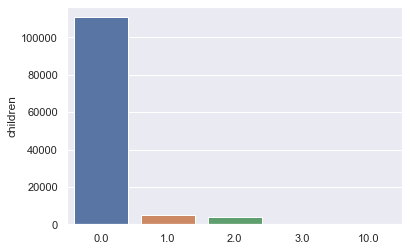

In [5]:
sns.barplot(x=clean_df['children'].value_counts().index, y=clean_df['children'].value_counts(), ci=None)
plt.show()

Kebanyakan, orang yang mem-booking hotel tidak membawa anak (children = 0). Karena itu, kita dapat berasumsi bahwa sebagian besar data children yang missing dapat diganti dengan nol (nilai modus).

In [6]:
# Mengganti NaN dengan nilai modus
mode_children = clean_df['children'].mode()[0]

clean_df['children'].fillna(mode_children, inplace=True)

Kita perhatikan kembali dataset yang sudah di-clean

In [7]:
# Di-transpose agar kita dapat melihat seluruh kolom
clean_df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


## Statistik Umum Dataset

In [8]:
# Mendapatkan nilai mean, median, dan sejenisnya
# Note: Data yang tidak bisa dihitung (seperti data categorical yang masih berbentuk teks) tidak ditampilkan
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Pertanyaan Seputar Dataset

Data-data seputar booking untuk hotel mungkin tidak jauh-jauh dari:
1. Berapa persentase booking yang di-cancel dari semua booking?
2. Pada bulan apa orang-orang paling banyak menginap, dan kapan saat paling sedikit (paling sepi)?
3. Apakah jenis hotel berpengaruh pada waktu booking? Mungkin resort hotel sering di-booking pada jauh-jauh hari dan berbeda dengan city hotel?

Karena itu, kita lakukan Exploratory Data Analysis (EDA) untuk mendapatkan jawaban dari keempat pertanyaan tersebut.

In [9]:
# Setting parameter font size agar nyaman dilihat
plt.rcParams.update({'font.size': 22, 
                    'axes.titlesize': 16,
                    'axes.labelsize': 16,
                    'xtick.labelsize': 14,
                    'ytick.labelsize': 14,
                    'legend.fontsize': 11})

### 1. Berapa persentase booking yang di-cancel dari semua booking?

Jika kita bicarakan secara umum, maka jumlah booking yang di-cancel adalah sebagai berikut.

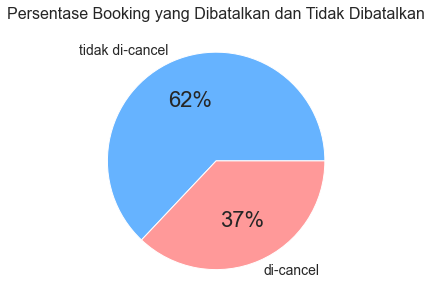

In [10]:
canceled = clean_df['is_canceled'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(canceled, labels=['tidak di-cancel', 'di-cancel'], autopct='%d%%',
       colors=['#66b3ff', '#ff9999'])
plt.title("Persentase Booking yang Dibatalkan dan Tidak Dibatalkan")
plt.show()

#### Bagaimana untuk masing-masing kategori hotel (city/resort)?

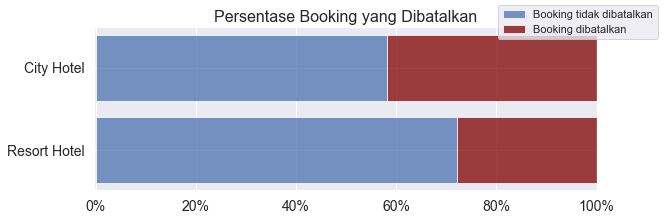

In [11]:
import matplotlib.ticker as mtick

resort = clean_df[clean_df['hotel'] == 'Resort Hotel']['is_canceled']
city = clean_df[clean_df['hotel'] == 'City Hotel']['is_canceled']
# Normalize
resort = resort.value_counts() / len(resort) * 100
city = city.value_counts() / len(city) * 100
# Canceled dan tidak canceled
not_canceled = pd.Series({'Resort Hotel': resort[0], 'City Hotel': city[0]})
canceled = pd.Series({'Resort Hotel': resort[1], 'City Hotel': city[1]})

fig, ax = plt.subplots(figsize=(9, 3))
ax.barh(not_canceled.index, not_canceled, alpha=0.75, label="Booking tidak dibatalkan")
ax.barh(canceled.index, canceled, left=not_canceled, color='maroon', alpha=0.75, label="Booking dibatalkan")
ax.set_title("Persentase Booking yang Dibatalkan")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlim(-0.25, 100)
fig.legend()

plt.show()

Dapat kita simpulkan bahwa pada masing-masing kategori hotel, booking untuk City Hotel lebih sering di-cancel daripada booking untuk Resort Hotel.

### 2. Pada bulan apa orang-orang paling banyak menginap, dan kapan saat paling sedikit (paling sepi)?

Kita akan menggunakan acuan kolom arrival_date_month di sini.

In [12]:
clean_df['date_arrival']  = pd.to_datetime(clean_df['arrival_date_day_of_month'].astype(str)
                                                 + clean_df['arrival_date_month'] 
                                                 + clean_df['arrival_date_year'].astype(str))

clean_df['arrival_count'] = 1

clean_df_date = clean_df.set_index('date_arrival').groupby(pd.Grouper(freq="M")).agg(sum)

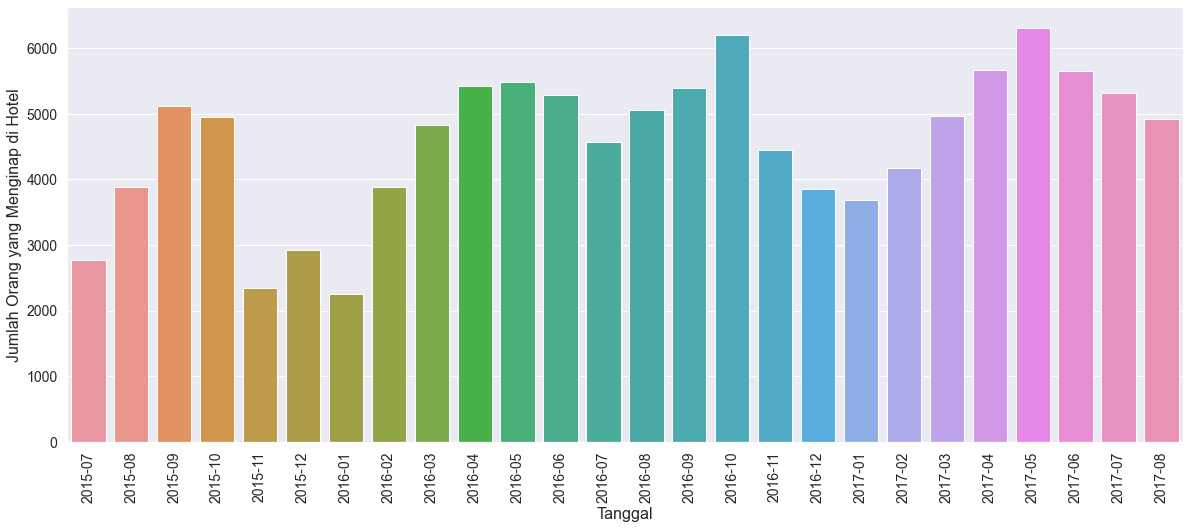

In [13]:
plt.figure(figsize=(20, 8))
sns.barplot(x=clean_df_date.index.to_period("M"), y=clean_df_date['arrival_count'])
plt.xticks(rotation=90)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Orang yang Menginap di Hotel')
plt.show()

Sehingga dapat disimpulkan bahwa Januari 2016 merupakan bulan tersepi dan Mei 2017 adalah bulan teramai.

### 3. Apakah jenis hotel berpengaruh pada waktu booking? Mungkin resort hotel sering di-booking pada jauh-jauh hari dan berbeda dengan city hotel?

Untuk mengecek hipotesis ini, kita akan menggunakan kolom lead_time. Berdasarkan informasi dataset ini dari ScienceDirect, deksripsi langsung dari lead_time adalah:
 > Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
 
 Dengan PMS sendiri artinya Property Management System (pada dataset ini dari database SQL). 

Intinya, di sini kita akan melakukan [Kolmogorov–Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) untuk mengecek apakah kedua sampel mempunyai distribusi yang sama dengan berhipotesis:
- H0: lead_time kedua jenis hotel mempunyai distribusi yang sama.
- H1: lead_time kedua jenis hotel berasal dari dua distribusi yang berbeda.

Kita akan menggunakan level of significance sebesar 0.05 (a = 0.05). Jika p_value > a, hipotesis nol ditolak.

In [14]:
from scipy.stats import ks_2samp
a = 0.05

In [15]:
# Sebelum itu, kita filter terlebih dahulu untuk booking yang tidak di cancel serta filter jenis hotel
resort = clean_df[(clean_df['is_canceled'] == 0) & (clean_df['hotel'] == 'Resort Hotel')]['lead_time']
city = clean_df[(clean_df['is_canceled'] == 0) & (clean_df['hotel'] == 'City Hotel')]['lead_time']

# Menggunakan 25 sampel
n_sample = 25
resort_sample = resort.sample(n_sample)
city_sample = city.sample(n_sample)
statistic, p_value = ks_2samp(resort_sample, city_sample, alternative='two-sided')

In [16]:
if p_value > a:
    print("Hipotesis nol tidak ditolak.")
else:
    print("Hipotesis nol ditolak")
    
print(f"""p-value: {p_value}
a: {a}
D: {statistic}""")

Hipotesis nol tidak ditolak.
p-value: 0.914993219397903
a: 0.05
D: 0.16


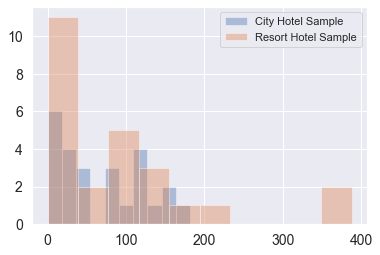

In [17]:
plt.hist(city_sample, alpha=0.4, label='City Hotel Sample')
plt.hist(resort_sample, alpha=0.4, label='Resort Hotel Sample')
plt.legend()

plt.show()

Dari hasil di atas, kemungkinan besar bahwa lead_time kedua jenis hotel berasal dari distribusi yang sama. Kesimpulannya adalah waktu reservasi (lead_time) untuk Resort Hotel dan City Hotel tidak berbeda.

## Data Leakage

Data leakage (kebocoran data) terjadi saat feature yang digunakan untuk training ternyata berkaitan langsung dengan prediksi atau target. Mari kita drop terlebih dahulu kolom yang tidak perlu.

In [18]:
ml_df = clean_df.drop(columns=['reservation_status_date', 'date_arrival', 'arrival_count'])

Target kita (dan target biasanya) adalah kolom is_canceled.

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb

In [20]:
# Membuat data kategori menjadi one hot encoded
X = pd.get_dummies(ml_df.drop(columns=['is_canceled']))
y = ml_df['is_canceled']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y) 

### Cross Validation dengan LightGBM

In [21]:
cv_score = cross_val_score(lgb.LGBMClassifier(), X_valid, y_valid)
print("Skor akurasi dengan cross validation (5 fold):", cv_score)

Skor akurasi dengan cross validation (5 fold): [1. 1. 1. 1. 1.]


Skor akurasi dari LightGBM fantastis. Sangat sempurna. Namun, seperti yang sudah diduga, ini disebabkan oleh data leakage. Kita telusuri terlebih dahulu kolom yang mengalami data leakage.

In [22]:
# Kolom target
clean_df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [23]:
# Salah satu kolom feature
clean_df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

Ini dia kolom dengan data leakage. Hampir sama persis dengan data target bukan? Perbedaannya ada kategori baru, yaitu 'No-Show'. Untuk membuat model yang lebih prediktif dan tidak overfit pada fitur ini, kita wajib drop kolom tersebut.

In [24]:
# Drop kolom reservation_status
X = pd.get_dummies(ml_df.drop(columns=['is_canceled', 'reservation_status']))
y = ml_df['is_canceled']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y) 

In [25]:
cv_score = cross_val_score(lgb.LGBMClassifier(), X_valid, y_valid)
print("Skor akurasi dengan cross validation (5 fold):", cv_score)

Skor akurasi dengan cross validation (5 fold): [0.83961474 0.83040201 0.83752094 0.82579564 0.83870968]
